# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [373]:
%matplotlib inline

In [374]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st



In [375]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
# Mouse Data has Mouse ID, Drug Regimen, Sex, Age_months, Weight (g)
# Study Results has Mouse ID, Timepoint, Tumor Volume (mm3), and Metastatic Sites
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
combined_results.head(15)

#combined_results.to_csv("combined.csv")
#combined_results["Mouse ID"].dtype


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [376]:
# Checking the number of mice.
no_of_mice = combined_results["Mouse ID"].nunique()
no_of_mice


249

In [377]:
# Check for any mouse ID with duplicate time points
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouseID = combined_results[combined_results.duplicated(["Mouse ID", "Timepoint"])]
dupe_ID = duplicateMouseID["Mouse ID"].unique()
dupe_ID

array(['g989'], dtype=object)

In [378]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_rows = combined_results[combined_results["Mouse ID"].isin(dupe_ID)]
dupe_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [379]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Need to figure out how to use the results from the Dupe ID
# clean_combined = combined_results.loc[combined_results["Mouse ID"] != str(dupe_ID)]
clean_combined = combined_results.loc[combined_results["Mouse ID"] != "g989"]

In [380]:
# Checking the number of mice in the clean DataFrame.
no_of_mice = clean_combined["Mouse ID"].nunique()
no_of_mice


248

## Summary Statistics

In [381]:
# Use the clean data frame for the Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_combined["Tumor Volume (mm3)"].describe()

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [382]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol = clean_combined.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
med_tumor_vol = clean_combined.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor_vol = clean_combined.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdev_tumor_vol = clean_combined.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor_vol = clean_combined.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
stats_by_drug = pd.DataFrame({"Mean Tumor Volume":mean_tumor_vol,
                                "Median Tumor Volume": med_tumor_vol,
                                "Tumor Volume Variance": var_tumor_vol,
                                "Tumor Volume Std. Dev.": stdev_tumor_vol,
                                "Tumor Volume Std. Err.": sem_tumor_vol})
stats_by_drug


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [383]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
agg_by_drug = clean_combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_by_drug

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

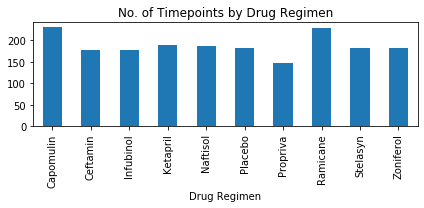

In [408]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_by_drug = clean_combined.groupby(["Drug Regimen"]).count()["Timepoint"]
timepoints_by_drug.plot(kind="bar", figsize=(6,3))

# Set a title for the chart
plt.title("No. of Timepoints by Drug Regimen")

plt.tight_layout()
plt.show()



Text(0, 0.5, 'No. of Timepoints')

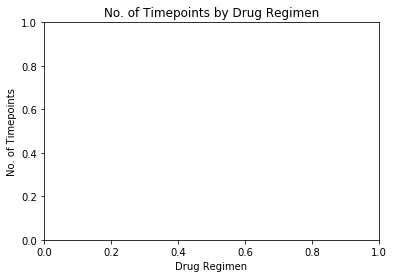

In [423]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set the x and y axis / data set

y_axis = timepoints_by_drug
x_axis = np.arange(0, len("Drug Regimen"))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("No. of Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Timepoints")

#plt.xlim(-0.75, len(["Drug Regimen"])-.25)
#plt.ylim(0, max(["Timepoints"]) + 5)

#plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")
#plt.xticks(tick_locations, x_axis)
#plt.show()



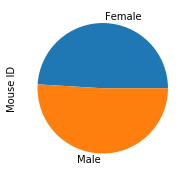

In [419]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mice = clean_combined.groupby(["Sex"]).count()["Mouse ID"]
sex_mice.plot(kind="pie", figsize=(6,3))


In [387]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [388]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [389]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [390]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [391]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [392]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [393]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

